In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# df_without = pd.read_csv('./without_name/all_headlines_without_names.tsv', sep="\t")
df_with = pd.read_csv('./mini/all_headlines.tsv', sep="\t")

In [3]:
# df_without.shape, 
df_with.shape 

(73492, 2)

In [4]:
# Unique value
df_with['뉴스제목'].nunique(), df_with['주가변동'].nunique()

(63731, 2)

In [5]:
# Remove Duplicates
df_with.drop_duplicates(subset=['뉴스제목'], inplace=True) #reviews열에서 중복인 내용이 있다면 중복 제거
print('총 샘플의 수 : ',len(df_with))

총 샘플의 수 :  63731


In [6]:
# NULL값 유무
# print(df_without.isnull().values.any())
print(df_with.isnull().values.any())

False


In [19]:
# Remove Null rows
df_with = df_with.dropna(how='any',axis=0)
print(df_without.isnull().values.any())

False


In [7]:
# after removing Null and Duplicates
df_with.shape

(63731, 2)

In [8]:
# without_len = df_without['뉴스제목'].astype(str).apply(len)
# # print(without_len.head())
# print(without_len.max())
# print(without_len.min())

with_len = df_with['뉴스제목'].astype(str).apply(len)
# print(without_len.head())
print(with_len.max())
print(with_len.min())

48
8


In [9]:

df_with['str_len']= df_with['뉴스제목'].str.len()

git test delete later

In [11]:
df_with.loc[(df_with['str_len'] < 10)]


,뉴스제목,주가변동,str_len
1453,[인사] SK그룹,0,9
2332,[인사] 한국전력,0,9
3179,[인사] LG전자,1,9
3904,[인사]삼성SDI,0,9
5019,[인사]삼성화재,0,8
5424,[인사] 삼성생명,1,9
5577,[인사] 삼성화재,0,9
6106,[인사] 삼성전기,0,9
6628,[인사]LG화학,0,8
15339,[인사]한국전력,1,8


In [12]:
df_with['뉴스제목'].head()

0             [클릭 e종목]"KB금융, 우수한 펀더멘털 입증...목표가 10% ↑"
1                    LG전자 "MZ세대 응원"…'라이프 이즈 굿' 캠페인 진행
2                             신한금융지주, 제20기 정기 주주총회 개최
3    [마켓인사이트]공유오피스 스파크플러스, SK텔레콤·미래에셋으로부터 전략적 투자 유...
4                [Hot-Line] “SK텔레콤, 나녹스 투자 우려 과도한 상황"
Name: 뉴스제목, dtype: object

최단:  8
최장:  48
평균:  31
(48,)


Text(0.5, 1.0, 'Sentence Length Distribution (With name)')

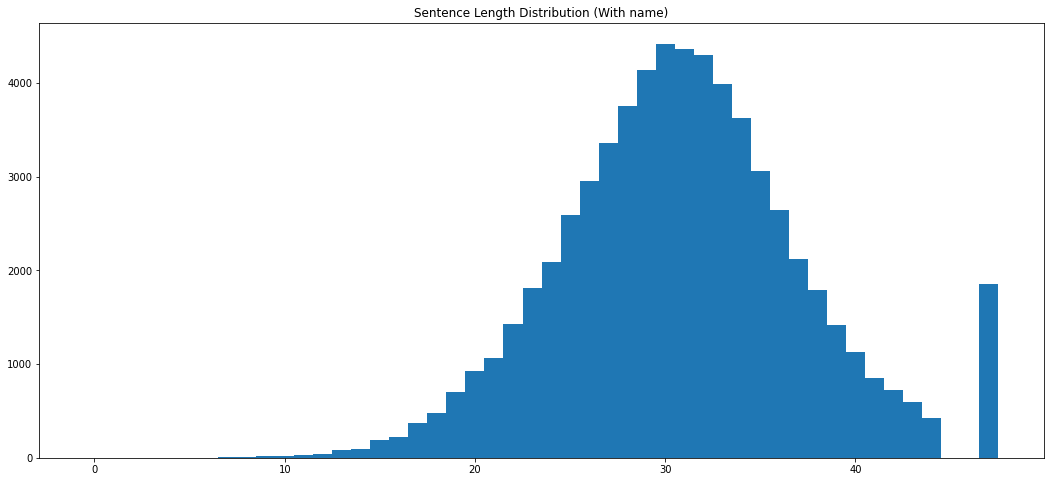

In [13]:
min_len = 999
max_len = 0
sum_len = 0

raw = df_with['뉴스제목'].tolist()

for sen in raw:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("최단: ", min_len)
print("최장: ", max_len)
print("평균: ", sum_len//len(raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in raw:
  sentence_length[len(sen)-1] += 1

print(sentence_length.shape)

f, ax = plt.subplots(figsize=(18,8))

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution (With name)")

In [14]:
with_head = [x for x in df_with['뉴스제목'] if type(x) is str]


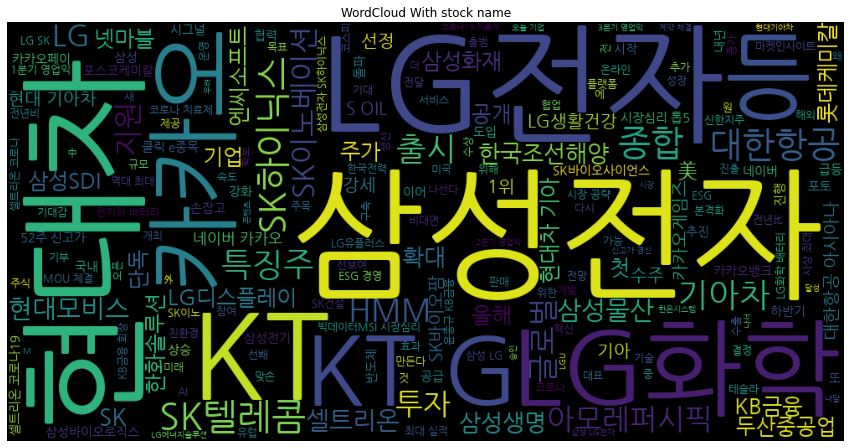

In [15]:
wordcloud = WordCloud(font_path='./fonts/NanumGothic.ttf', width=1000, height=500).generate(' '.join(with_head))
plt.figure(figsize=(15,10))
plt.title("WordCloud With stock name")
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Now really want to see what I can do with the data.

<AxesSubplot:>

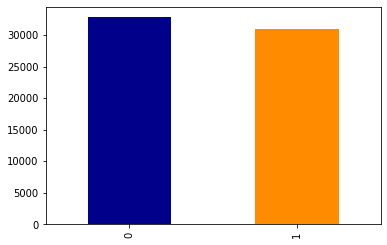

In [16]:
# df_with['주가변동'].value_counts().plot(kind='bar', color)
df_with['주가변동'].value_counts().plot.bar(color=['darkblue','darkorange'])

In [17]:
print('Number of Price up: {}'.format(df_with['주가변동'].value_counts()[1]))
print('Number of Price down: {}'.format(df_with['주가변동'].value_counts()[0]))
with_dif = df_with['주가변동'].value_counts()[0] - df_with['주가변동'].value_counts()[1]

Number of Price up: 30938
Number of Price down: 32793


In [18]:
df_with.shape

(63731, 3)

In [109]:
# match and scale the number of up and down
# 
# pd_with = df_with.drop(df_with[df_with['주가변동'] == 0].sample(n=with_dif).index)


# del(pd_without)
# del(pd_with)

((526218, 2), (468384, 2))

In [111]:
print('Number of Price up: {}'.format(pd_with['주가변동'].value_counts()[1]))
print('Number of Price down: {}'.format(pd_with['주가변동'].value_counts()[0]))


Number of Price up: 234192
Number of Price down: 234192


In [20]:
# with_word_counts = pd_with['뉴스제목'].astype(str).apply(lambda x:len(x.split(' ')))
with_word_counts = df_with['뉴스제목'].astype(str).apply(lambda x:len(x.split(' ')))

print(with_word_counts.shape)


(63731,)


In [21]:
print('with max: {}'.format(np.max(with_word_counts)))
print('with min: {}'.format(np.min(with_word_counts)))
print('with mean: {}'.format(np.mean(with_word_counts)))
print('with std: {}'.format(np.std(with_word_counts)))
print('with median: {}'.format(np.median(with_word_counts)))


# max is 15 and mean of 6-7

with max: 14
with min: 1
with mean: 6.739420376269005
with std: 1.590005985685392
with median: 7.0


Text(0.5, 1.0, 'words Length Distribution (With name)')

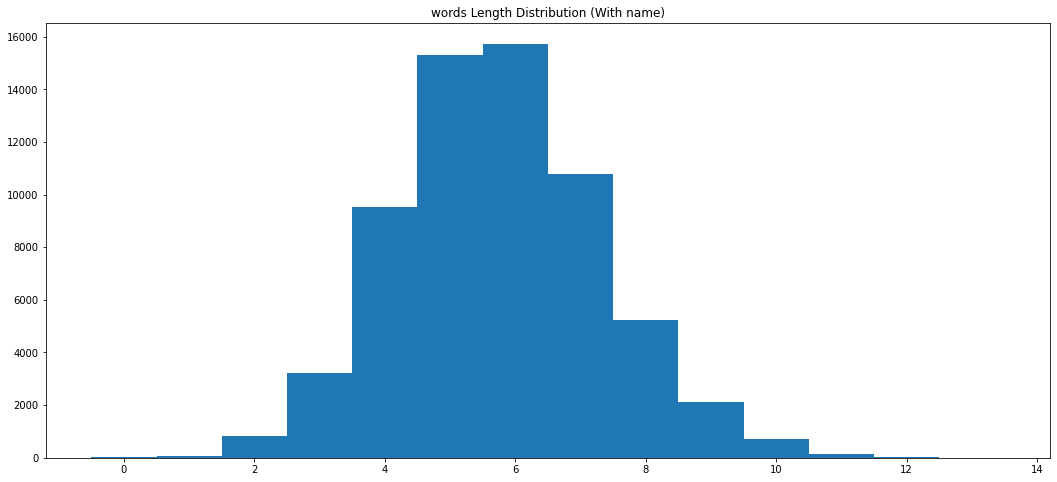

In [22]:
# with histogram
max_c = np.max(with_word_counts)
words_length = np.zeros((max_c), dtype=np.int)

for sen in with_word_counts:
  words_length[sen-1] += 1

f, ax = plt.subplots(figsize=(18,8))

plt.bar(range(max_c), words_length, width=1.0)
plt.title("words Length Distribution (With name)")

<AxesSubplot:>

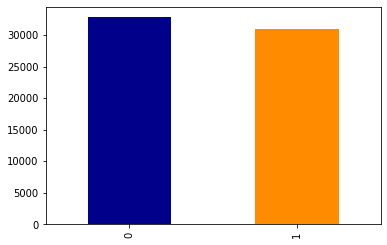

In [24]:
df_with['주가변동'].value_counts().plot.bar(color=['darkblue','darkorange'])

In [25]:
# df_without = pd.read_csv('./without_name/all_headlines_without_names.tsv', sep="\t")
# df_with = pd.read_csv('./with_name/all_headlines.tsv', sep="\t")

df_with.to_csv('./mini/EDA_headlines.tsv', index=False, encoding='utf-8', sep="\t")